In [1]:
import numpy as np
anonymize = True

In [2]:
filename = 'user_collections.txt'
with open(filename, "r") as f:
    lines = f.readlines()
f.close()

In [3]:
lines = np.array(lines)
# remove mobu test runs (https://github.com/lsst-sqre/mobu/)
keep = [line.find('mobu') == -1 for line in lines]
lines = lines[keep]
len(lines)

1697

In [4]:
unames = []

for i,line in enumerate(lines):
    p = line.find('u/')
    #print(i)
    assert(p >= 0)
    lines[i] = line[(p+2):]
    #print(lines[i])
    tokens = lines[i].split('/')
    unames.append(tokens[0])

In [5]:
len(unames)

1697

In [6]:
print('number of RSP dp02 Butler user collection = ', len(np.unique(unames)))
len(lines)

number of RSP dp02 Butler user collection =  65


1697

In [7]:
unames = np.array(unames)
print('number of unique non-bot RSP users with a dp02 Butler user collection = ', len(np.unique(unames)))

number of unique non-bot RSP users with a dp02 Butler user collection =  65


In [8]:
if not anonymize:
    print(np.unique(unames))

<Axes: ylabel='collections per user'>

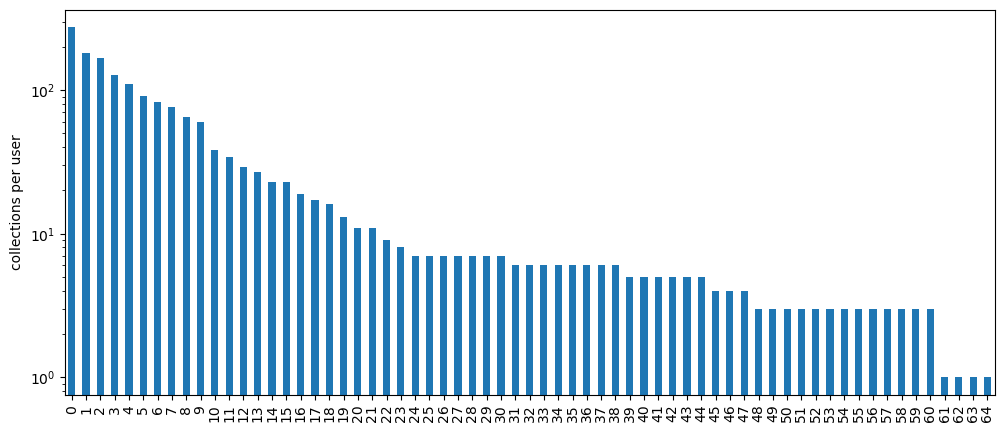

In [9]:
# make a histogram of these usernames ?

import pandas
from collections import Counter

uname_counts = Counter(unames)
df = pandas.DataFrame.from_dict(uname_counts, orient='index', columns=['ncoll'])
df.sort_values(by='ncoll', ascending=False, inplace=True)
df
df.plot(kind='bar', use_index=(not anonymize), legend=False, figsize=(12, 5), logy=True, xlabel='user name', ylabel='collections per user')

In [10]:
from lsst.daf.butler import Butler

butler_repo = 'dp02'

butler = Butler(butler_repo)

my_collections = butler.registry.queryCollections('*')

In [11]:
len(my_collections)


3603

In [12]:
keep = [mc.find('mobu') == -1 for mc in my_collections]
print(np.sum(keep))

1744


In [13]:
type(my_collections)

list

In [14]:
#### NOTE : NEED TO DEDUPLICATE CASES LIKE  'u/XXX/coadd_recreation_nb' versus 'u/XXX/coadd_recreation_nb/20220604T231339Z'

my_collections.sort()

In [15]:
#my_collections